In [8]:
# For a healthy macronutrient intake, the general recommendation is to aim for 
# 45-65% of daily calories from carbohydrates, 20-35% from fat, and 10-35% from protein. 
# Carbs: 1 gram of carbohydrates = 4 calories
# Protein: 1 gram of protein = 4 calories
# Fat: 1 gram of fat = 9 calories 

# Make a bubble chart with Calories vs. Fat/Carbs/Protein, with different categories of the food highlighted in color
# Begs the question: Which categories of foods should you order for the best Macro ratio?

# Make calculations on whether or not the fats/carbs/proteins are in the right percentage range

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
drinks = pd.read_csv('drinks-nutrition.csv')
drinks_expanded = pd.read_csv('drinks-expanded.csv')
food = pd.read_csv('food-nutrition-category.csv')

In [11]:
food.head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Category
0,8-Grain Roll,380,6.0,70,7,10,bagel
1,Chonga Bagel,300,5.0,50,3,12,bagel
2,Cinnamon Raisin Bagel,270,1.0,58,3,9,bagel
3,Everybody's Favorite - Bantam Bagel (2 Pack),100,3.5,14,0,3,bagel
4,Everything Bagel with Cheese,290,3.5,53,2,11,bagel


In [12]:
# What has an enormous fiber amount of 20? (Is it a typo?)
food[food['Fiber (g)']>15]

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Category
16,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23,meal


In [13]:
# What types of foods are there?
food['Item'].unique()

array(['8-Grain Roll', 'Chonga Bagel', 'Cinnamon Raisin Bagel',
       "Everybody's Favorite - Bantam Bagel (2 Pack)",
       'Everything Bagel with Cheese',
       'French Toast - Bantam Bagels (2 Pack)', 'Multigrain Bagel',
       'Plain Bagel', 'Sprouted Grain Vegan Bagel',
       'The Classic - Bantam Bagels (2 Pack)', 'BBQ Chicken Protein Box',
       'Cheese & Fruit Protein Box',
       'Chicken & Quinoa Protein Bowl with Black Beans and Greens',
       'Chicken Wrap Protein Box', 'Eggs & Cheese Protein Box',
       "Farmers' Market Protein Box",
       'Lentils & Vegetable Protein Bowl with Brown Rice',
       'PB&J Protein Box', 'Smoked Turkey Protein Box',
       'Cookie Butter Bar', 'Gluten-Free Marshmallow Dream Bar',
       "S'mores Bar", "S'mores Bar Multipack",
       'Sous Vide Egg Bites: Bacon & Gruyere',
       'Sous Vide Egg Bites: Egg White & Red Pepper',
       'Seasonal Fruit Blend', 'Classic Whole-Grain Oatmeal',
       'Hearty Blueberry Oatmeal', "Justin's Chocol

In [14]:
food.describe()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,356.637168,16.362832,41.486726,2.849558,11.469027
std,127.710685,8.288936,15.796764,2.888466,8.463230
min,90.000000,0.000000,5.000000,0.000000,1.000000
25%,280.000000,9.000000,31.000000,1.000000,5.000000
50%,360.000000,17.000000,42.000000,2.000000,8.000000
75%,450.000000,23.000000,53.000000,3.000000,19.000000
max,650.000000,37.000000,80.000000,21.000000,34.000000


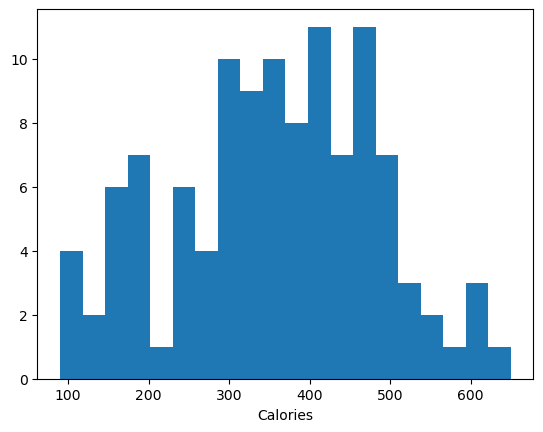

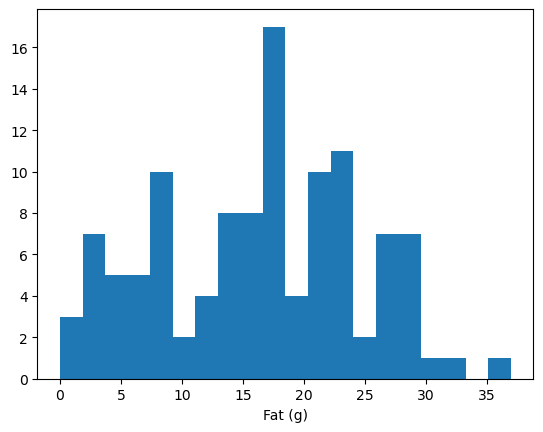

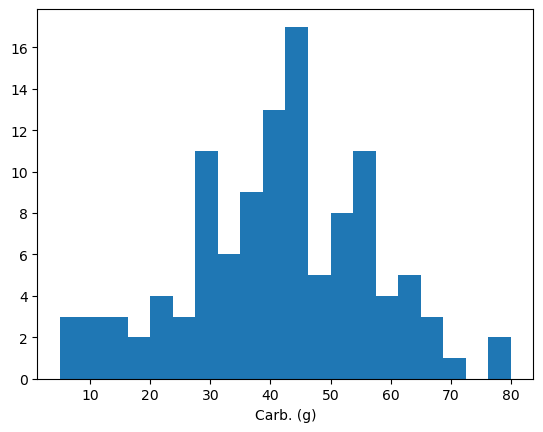

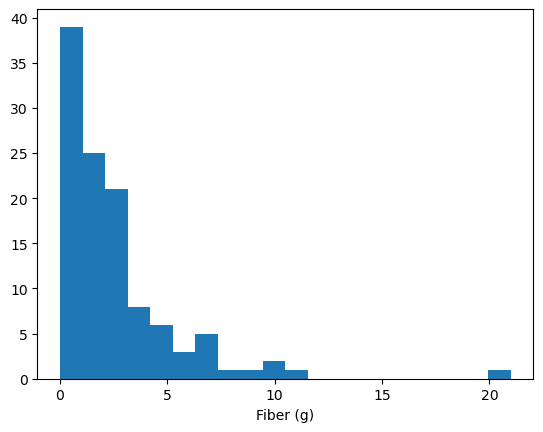

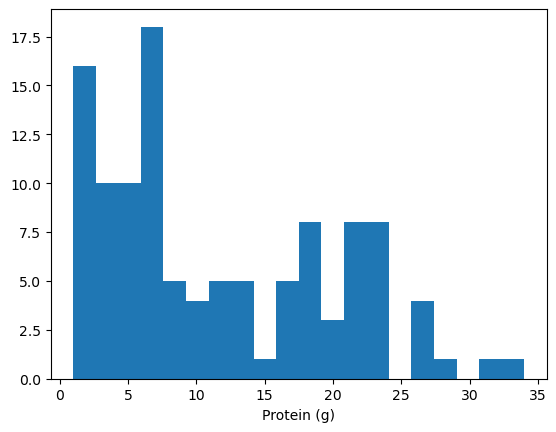

In [15]:
food_columns = list(food.columns)
food_columns.pop(0)
food_columns.pop(-1)
for col in food_columns:
    plt.hist(food[col], bins=20)
    plt.xlabel(col)
    plt.show()

In [16]:
food_columns

['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)']

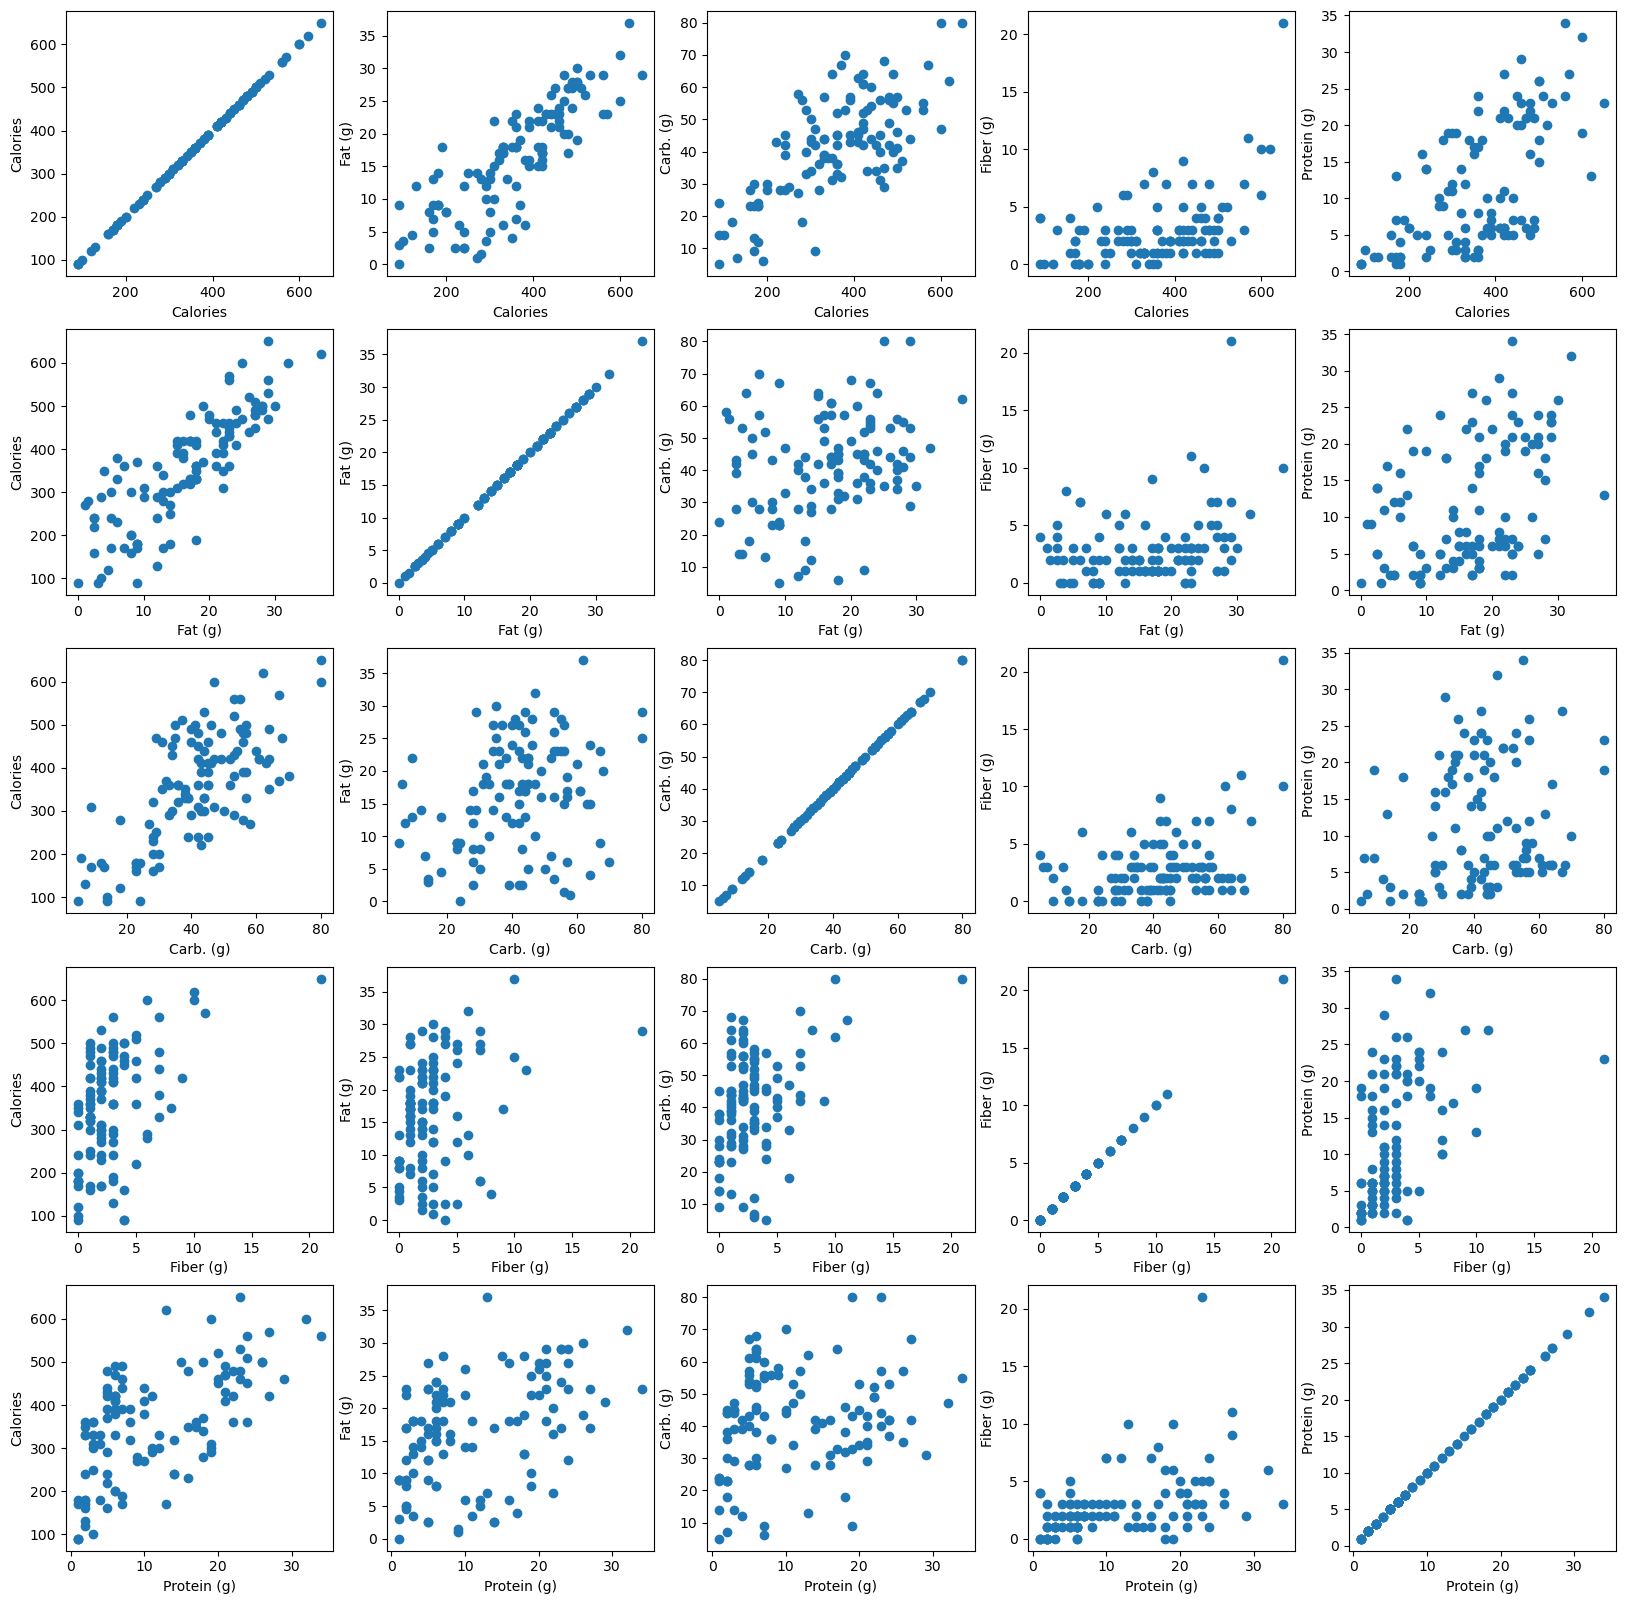

In [17]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        ax[i,j].scatter(x=food[food_columns[i]], y=food[food_columns[j]])
        ax[i,j].set_xlabel(food_columns[i])
        ax[i,j].set_ylabel(food_columns[j])

plt.show()

In [18]:
# For a healthy macronutrient intake, the general recommendation is to aim for 
# 45-65% of daily calories from carbs, 20-35% from fat, and 10-35% from protein. 
# Carbs: 1 gram of carbohydrates = 4 calories
# Protein: 1 gram of protein = 4 calories
# Fat: 1 gram of fat = 9 calories 

food['Fat (cal)'] = food['Fat (g)'] * 9
food['Carb (cal)'] = food['Carb. (g)'] * 4
food['Protein (cal)'] = food['Protein (g)'] * 4

food['Fat (%)'] = np.round(food['Fat (cal)']*100/food['Calories'], 2)
food['Carb (%)'] = np.round(food['Carb (cal)']*100/food['Calories'], 2)
food['Protein (%)'] = np.round(food['Protein (cal)']*100/food['Calories'], 2)

food['Fat - healthy level?'] = np.where((food['Fat (%)'] > 20) & (food['Fat (%)'] < 35), 1, 0)
food['Carb - healthy level?'] = np.where((food['Carb (%)'] > 45) & (food['Carb (%)'] < 65), 1, 0)
food['Protein - healthy level?'] = np.where((food['Protein (%)'] > 10) & (food['Protein (%)'] < 35), 1, 0)

food['Healthy score (/3)'] = food['Fat - healthy level?'] + food['Carb - healthy level?'] + food['Protein - healthy level?']

food.sort_values(by='Healthy score (/3)', ascending=False).head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Category,Fat (cal),Carb (cal),Protein (cal),Fat (%),Carb (%),Protein (%),Fat - healthy level?,Carb - healthy level?,Protein - healthy level?,Healthy score (/3)
18,Smoked Turkey Protein Box,360,12.0,42,5,24,meal,108.0,168,96,30.00,46.67,26.67,1,1,1,3
108,Spinach Feta & Cage Free Egg White Breakfast Wrap,290,10.0,33,6,19,sandwich,90.0,132,76,31.03,45.52,26.21,1,1,1,3
94,Herbed Chicken & Fig Spread Small Sandwich,300,8.0,43,2,19,sandwich,72.0,172,76,24.00,57.33,25.33,1,1,1,3
95,Homestyle Chicken & Double-Smoked Bacon,480,17.0,57,3,23,sandwich,153.0,228,92,31.88,47.50,19.17,1,1,1,3
98,Reduced-Fat Turkey Bacon & Cage Free Egg White...,230,6.0,28,2,16,sandwich,54.0,112,64,23.48,48.70,27.83,1,1,1,3


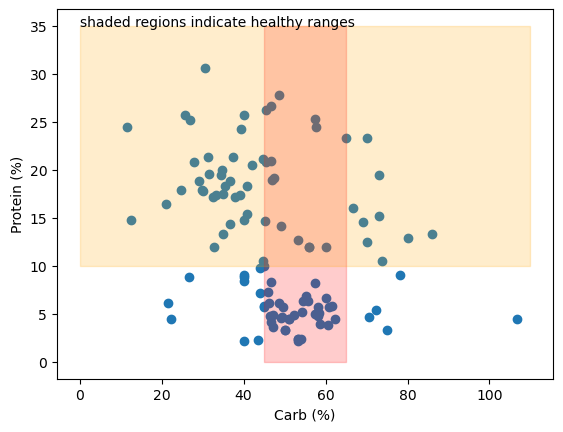

In [19]:
# Is there a way to show the % macro values for each item, all on the same graph, and show whether or not they are in a good range?
# Start with carbs and protein
# 45-65% of daily calories from carbs, 20-35% from fat, and 10-35% from protein. 
plt.scatter(x=food['Carb (%)'], y=food['Protein (%)'])
plt.xlabel("Carb (%)")
plt.ylabel("Protein (%)")
plt.fill_between([45,65], 0, 35, color='red', alpha=0.2)
plt.fill_between([0,110], 10, 35, color='orange', alpha=0.2)
plt.annotate("shaded regions indicate healthy ranges", (0, 35))
plt.show()

In [20]:
# What item has over 100% carbs?
food[food['Carb (%)'] > 100]

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Category,Fat (cal),Carb (cal),Protein (cal),Fat (%),Carb (%),Protein (%),Fat - healthy level?,Carb - healthy level?,Protein - healthy level?,Healthy score (/3)
25,Seasonal Fruit Blend,90,0.0,24,4,1,other,0.0,96,4,0.0,106.67,4.44,0,0,0,0


Text(0, 95, 'shaded regions indicate healthy ranges')

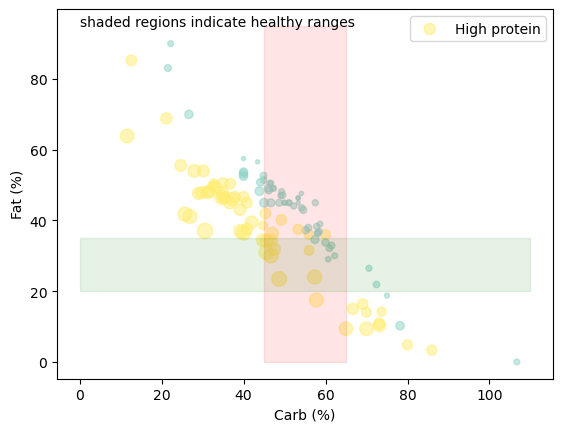

In [21]:
plt.scatter(x=food['Carb (%)'], y=food['Fat (%)'], label='High protein', s=food['Protein (%)']*4, c=food['Protein - healthy level?'], alpha=0.5, cmap='Set3')
plt.xlabel("Carb (%)")
plt.ylabel("Fat (%)")
plt.fill_between([45,65], 0, 95, color='red', alpha=0.1)
plt.fill_between([0,110], 20, 35, color='green', alpha=0.1)
plt.legend()
plt.annotate("shaded regions indicate healthy ranges", (0, 95))

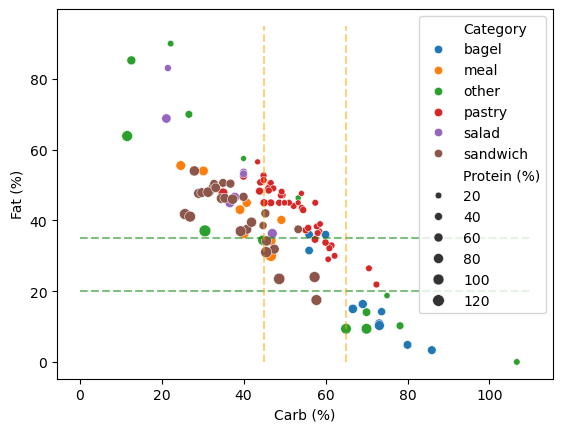

In [45]:
sns.scatterplot(data=food, x='Carb (%)', y='Fat (%)', size=food['Protein (%)']*4, hue='Category')


plt.plot([0, 110], [20, 20], "--", color='green', alpha=0.5)
plt.plot([0, 110], [35, 35], "--", color='green', alpha=0.5)

plt.plot([45, 45], [0, 95], "--", color='orange', alpha=0.5)
plt.plot([65, 65], [0, 95], "--", color='orange', alpha=0.5)
# (x=, y=food[], label='High protein', , c=food['Protein - healthy level?'], alpha=0.5, cmap='Set3')
# plt.xlabel("Carb (%)")
# plt.ylabel("Fat (%)")
# plt.fill_between([45,65], 0, 95, color='red', alpha=0.1)
# plt.fill_between([0,110], 20, 35, color='green', alpha=0.1)
# plt.legend()
# plt.annotate("shaded regions indicate healthy ranges", (0, 95))

In [723]:
print(category_names)

Index(['bagel', 'meal', 'other', 'pastry', 'salad', 'sandwich'], dtype='object')


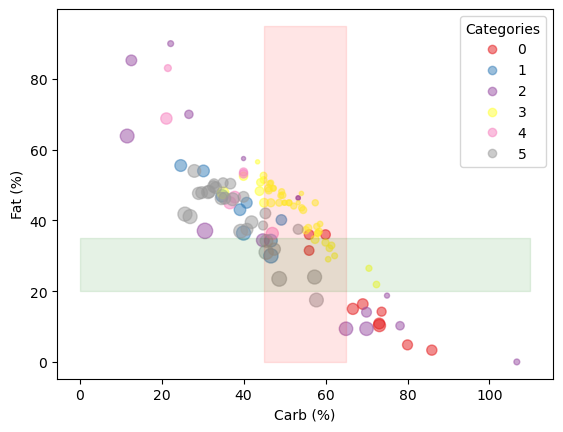

In [724]:
category_codes, category_names = pd.factorize(food['Category'])

scatter = plt.scatter(x=food['Carb (%)'], y=food['Fat (%)'], s=food['Protein (%)']*4, c=category_codes, cmap='Set1', alpha=0.5)
plt.xlabel("Carb (%)")
plt.ylabel("Fat (%)")
plt.fill_between([45,65], 0, 95, color='red', alpha=0.1)
plt.fill_between([0,110], 20, 35, color='green', alpha=0.1)
plt.legend(*scatter.legend_elements(), title="Categories")
# plt.annotate("shaded regions indicate healthy ranges", (0, 95))

## Sorting by top foods based on preference

In [320]:
# SORT BY...

# Healthiest balance (best ratio of macros)
food[food['Healthy score (/3)'] == 3]

# Foods high in carbs, protein, or fat:
X = 0.9                 # Top 80% of high...
macro = 'Carb. (g)'     # carbs
macro = 'Protein (g)'   # protein
macro = 'Fat (g)'       # fat
macro = 'Fiber (g)'       # fat
food[food[macro] >= food[macro].quantile(X)].sort_values(by=macro, ascending=False)

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Category,Fat (cal),Carb (cal),Protein (cal),Fat (%),Carb (%),Protein (%),Fat - healthy level?,Carb - healthy level?,Protein - healthy level?,Healthy score (/3)
16,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23,meal,261.0,320,92,40.15,49.23,14.15,0,1,1,2
84,Za'atar Chicken & Lemon Tahini Salad,570,23.0,67,11,27,salad,207.0,268,108,36.32,47.02,18.95,0,1,1,2
81,Green Goddess Avocado Salad,620,37.0,62,10,13,salad,333.0,248,52,53.71,40.00,8.39,0,0,0,0
109,Strawberries & Jam Sandwich,600,25.0,80,10,19,sandwich,225.0,320,76,37.50,53.33,12.67,0,1,1,2
12,Chicken & Quinoa Protein Bowl with Black Beans...,420,17.0,42,9,27,meal,153.0,168,108,36.43,40.00,25.71,0,0,1,1
6,Multigrain Bagel,350,4.0,64,8,17,bagel,36.0,256,68,10.29,73.14,19.43,0,0,1,1
0,8-Grain Roll,380,6.0,70,7,10,bagel,54.0,280,40,14.21,73.68,10.53,0,0,1,1
8,Sprouted Grain Vegan Bagel,330,6.0,57,7,12,bagel,54.0,228,48,16.36,69.09,14.55,0,0,1,1
82,Roasted Carrot & Kale Side Salad,440,26.0,44,7,10,salad,234.0,176,40,53.18,40.00,9.09,0,0,0,0
83,Turkey & Fire-Roasted Corn Salad,560,29.0,53,7,24,salad,261.0,212,96,46.61,37.86,17.14,0,0,1,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Lentils & Vegetable Protein Bowl with Brown Rice'),
  Text(1, 0, "Za'atar Chicken & Lemon Tahini Salad"),
  Text(2, 0, 'Green Goddess Avocado Salad'),
  Text(3, 0, 'Strawberries & Jam Sandwich'),
  Text(4, 0, 'Chicken & Quinoa Protein Bowl with Black Beans and Greens'),
  Text(5, 0, 'Multigrain Bagel'),
  Text(6, 0, '8-Grain Roll'),
  Text(7, 0, 'Sprouted Grain Vegan Bagel'),
  Text(8, 0, 'Roasted Carrot & Kale Side Salad'),
  Text(9, 0, 'Turkey & Fire-Roasted Corn Salad'),
  Text(10, 0, 'Egg Salad Sandwich'),
  Text(11, 0, 'Certified Gluten-Free Breakfast Sandwich'),
  Text(12, 0, 'Roasted Turkey & Dill Havarti Sandwich'),
  Text(13, 0, 'Spinach Feta & Cage Free Egg White Breakfast Wrap')])

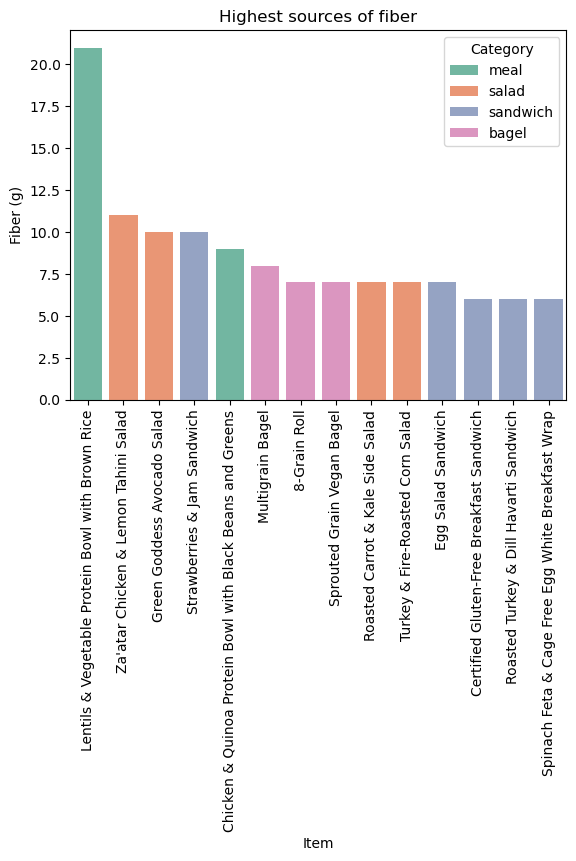

In [327]:
macro, thresh = 'Fiber (g)', 0.9       # fiber

fiber = food[food[macro] >= food[macro].quantile(X)].sort_values(by=macro, ascending=False)
sns.barplot(data=fiber, x='Item', y=macro, hue='Category', palette='Set2')
plt.title("Highest sources of fiber")
plt.xticks(rotation=90)

## New method of highlighting certain food categories

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


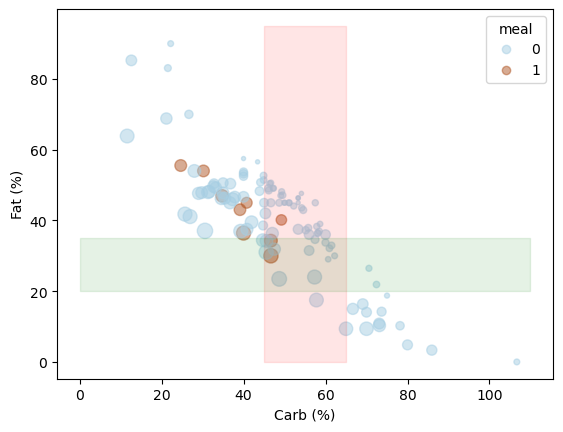

In [812]:
# Keep the selected category highlighted, make the other categories 'mute'
categories = ['bagel', 'meal', 'other', 'pastry', 'salad', 'sandwich']
category = categories[1]
df = food.copy()
df['Category'] = df['Category'].where(food['Category']==category, 'mute')
df.sample(5)

category_codes, category_names = pd.factorize(df['Category'])
print(category_codes)
scatter = plt.scatter(x=food['Carb (%)'], y=food['Fat (%)'], s=food['Protein (%)']*4, c=category_codes, cmap='Paired', alpha=0.5)
plt.xlabel("Carb (%)")
plt.ylabel("Fat (%)")
plt.fill_between([45,65], 0, 95, color='red', alpha=0.1)
plt.fill_between([0,110], 20, 35, color='green', alpha=0.1)
plt.legend(*scatter.legend_elements(), title=category)

### Pie chart of the categories

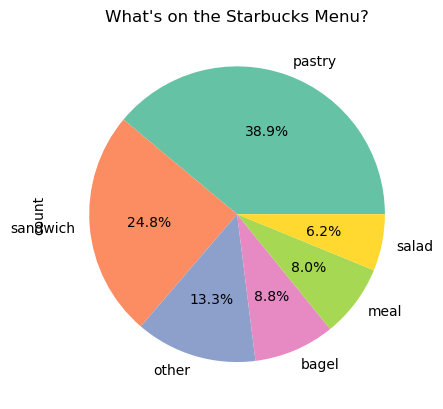

In [109]:
food['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="What's on the Starbucks Menu?", colors=sns.color_palette('Set2'))

plt.show()

In [129]:
food.head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Category,Fat (cal),Carb (cal),Protein (cal),Fat (%),Carb (%),Protein (%),Fat - healthy level?,Carb - healthy level?,Protein - healthy level?,Healthy score (/3)
0,8-Grain Roll,380,6.0,70,7,10,bagel,54.0,280,40,14.21,73.68,10.53,0,0,1,1
1,Chonga Bagel,300,5.0,50,3,12,bagel,45.0,200,48,15.00,66.67,16.00,0,0,1,1
2,Cinnamon Raisin Bagel,270,1.0,58,3,9,bagel,9.0,232,36,3.33,85.93,13.33,0,0,1,1
3,Everybody's Favorite - Bantam Bagel (2 Pack),100,3.5,14,0,3,bagel,31.5,56,12,31.50,56.00,12.00,1,1,1,3
4,Everything Bagel with Cheese,290,3.5,53,2,11,bagel,31.5,212,44,10.86,73.10,15.17,0,0,1,1


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

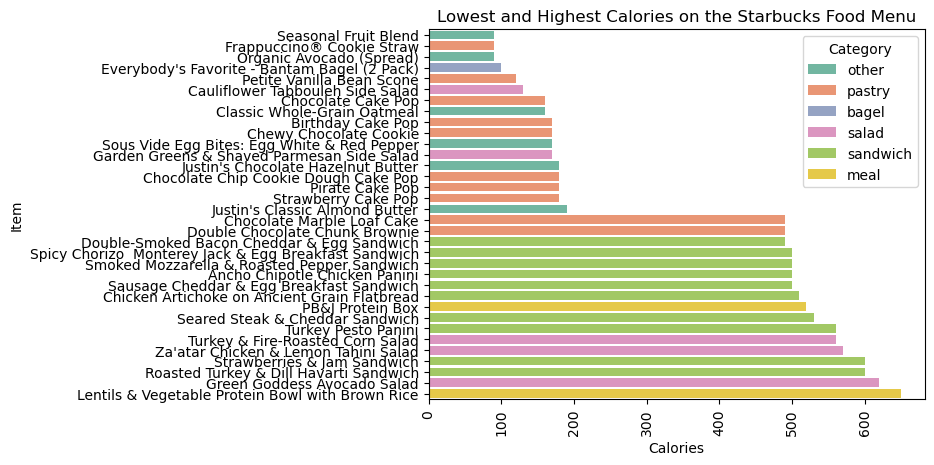

In [148]:
col, thresh = 'Calories', 0.15
low_cal_food = food[food[col] <= food[col].quantile(thresh)].sort_values(by=col, ascending=True)
low_cal_food

col, thresh = 'Calories', 0.85
high_cal_food = food[food[col] >= food[col].quantile(thresh)].sort_values(by=col, ascending=True)
high_cal_food

calorie_food = pd.concat([low_cal_food, high_cal_food], axis=0)

sns.barplot(data=calorie_food, y='Item', x='Calories', hue='Category', palette='Set2')
plt.title("Lowest and Highest Calories on the Starbucks Food Menu")
plt.xticks(rotation=90)

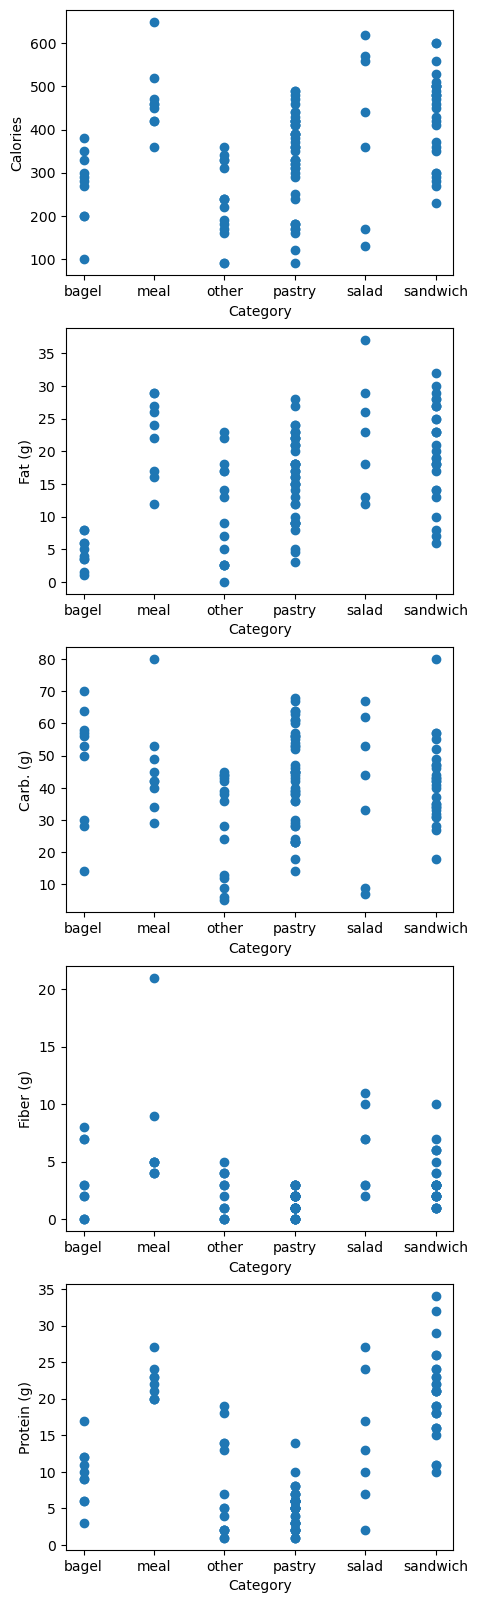

In [178]:
# Can I turn this into a scatter plot with labeled dots?
fig, ax = plt.subplots(5,1, figsize=(5, 20))

macros = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)']
for i in range(5):
    ax[i].scatter(x=food['Category'], y=food[macros[i]])
    ax[i].set_xlabel('Category')
    ax[i].set_ylabel(macros[i])
        
# ax = sns.scatterplot(x='Category', y='Calories', data=food)

plt.show()

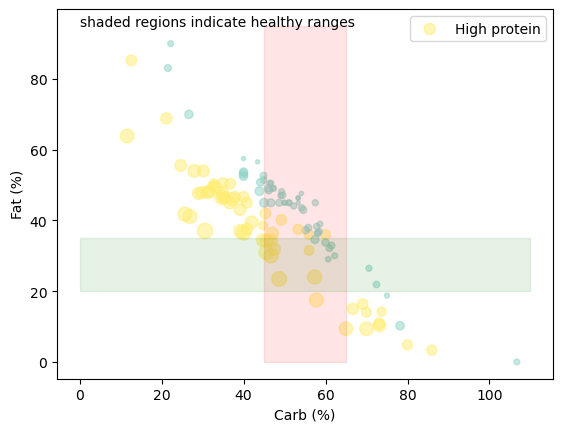

In [188]:
X=food['Carb (%)']
Y=food['Fat (%)']
LABELS=food['Item']

plt.scatter(x=X, y=Y, label='High protein', s=food['Protein (%)']*4, c=food['Protein - healthy level?'], alpha=0.5, cmap='Set3')
plt.xlabel("Carb (%)")
plt.ylabel("Fat (%)")
plt.fill_between([45,65], 0, 95, color='red', alpha=0.1)
plt.fill_between([0,110], 20, 35, color='green', alpha=0.1)
plt.legend()
plt.annotate("shaded regions indicate healthy ranges", (0, 95))

# -----------------------------------------------------------------------------------------

# for i, label in enumerate(LABELS):
#     plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,0), ha='center')

plt.show()

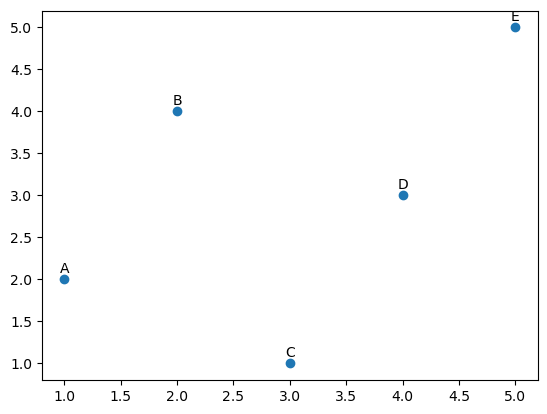

In [206]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 1, 3, 5])
labels = ["A", "B", "C", "D", "E"]

plt.scatter(x, y)

for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

['Spinach Feta & Cage Free Egg White Breakfast Wrap', 'Ancho Chipotle Chicken Panini', 'BBQ Chicken Protein Box', 'Smoked Turkey Protein Box', 'Homestyle Chicken & Double-Smoked Bacon', 'Reduced-Fat Turkey Bacon & Cage Free Egg White Breakfast Sandwich', "Everybody's Favorite - Bantam Bagel (2 Pack)", 'Herbed Chicken & Fig Spread Small Sandwich']


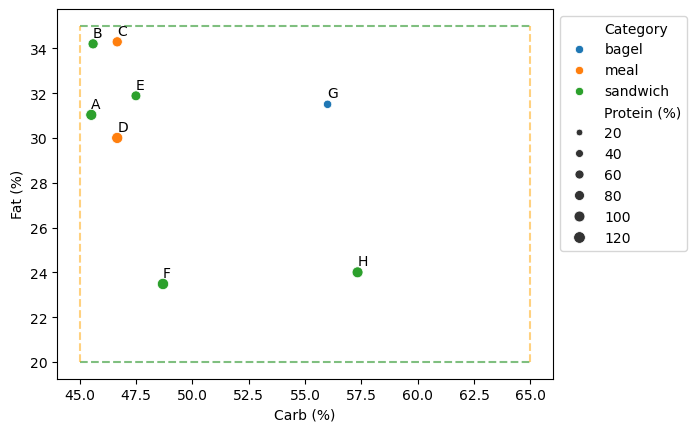

In [276]:
healthy = food[food['Healthy score (/3)']==3].sort_values(by='Carb (%)', ascending=True)
x=list(healthy['Carb (%)'])
y=list(healthy['Fat (%)'])
LABELS = list(healthy['Item'])
print(LABELS)
LABELS = list(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

ax = sns.scatterplot(data=healthy, x='Carb (%)', y='Fat (%)', size=food['Protein (%)']*4, hue='Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for i, label in enumerate(LABELS):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='left')

plt.plot([45, 65], [20, 20], "--", color='green', alpha=0.5)
plt.plot([45, 65], [35, 35], "--", color='green', alpha=0.5)

plt.plot([45, 45], [20, 35], "--", color='orange', alpha=0.5)
plt.plot([65, 65], [20, 35], "--", color='orange', alpha=0.5)

['Lemon Chiffon Yogurt', 'Burrata & Basil Pesto Small Sandwich', "Za'atar Chicken & Lemon Tahini Salad", 'Lentils & Vegetable Protein Bowl with Brown Rice', 'Strawberries & Jam Sandwich', 'The Classic - Bantam Bagels (2 Pack)', 'Cinnamon Morning Bun', 'Honey BBQ Sriracha Chicken Sandwich', 'French Toast - Bantam Bagels (2 Pack)', 'Petite Vanilla Bean Scone', 'Michigan Cherry Oat Bar', 'Cranberry Orange Scone', 'Pumpkin Bread', 'Frappuccino® Cookie Straw']


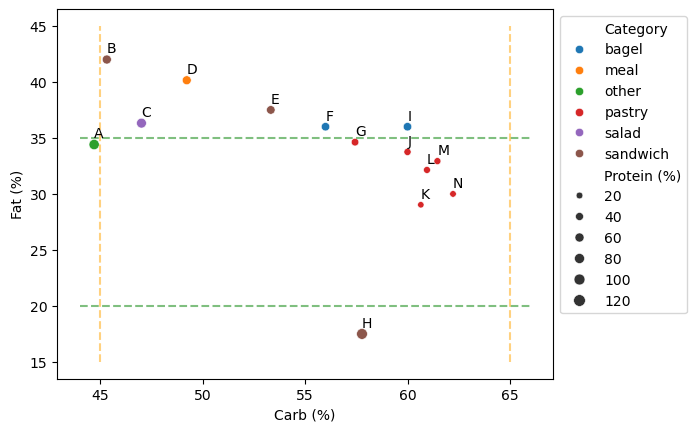

In [284]:
mostly_healthy = food[food['Healthy score (/3)']==2].sort_values(by='Carb (%)', ascending=True)
x=list(mostly_healthy['Carb (%)'])
y=list(mostly_healthy['Fat (%)'])
LABELS = list(mostly_healthy['Item'])
print(LABELS)
LABELS = list(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'])

ax = sns.scatterplot(data=mostly_healthy, x='Carb (%)', y='Fat (%)', size=food['Protein (%)']*4, hue='Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for i, label in enumerate(LABELS):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='left')
xrange = [44, 66]
yrange = [15, 45]
plt.plot(xrange, [20, 20], "--", color='green', alpha=0.5)
plt.plot(xrange, [35, 35], "--", color='green', alpha=0.5)

plt.plot([45, 45], yrange, "--", color='orange', alpha=0.5)
plt.plot([65, 65], yrange, "--", color='orange', alpha=0.5)

['Cauliflower Tabbouleh Side Salad', 'Organic Avocado (Spread)', "Justin's Chocolate Hazelnut Butter", 'Cookie Butter Bar', 'Peanut butter cup cookie', 'Green Goddess Avocado Salad', 'Roasted Carrot & Kale Side Salad', 'Butterfly Cookie', 'Almond Croissant', 'Chocolate Hazelnut Croissant', 'Double Chocolate Brownie', 'Double Chocolate Chunk Brownie', 'Cheese Danish', 'Gluten-Free Marshmallow Dream Bar', 'Hearty Blueberry Oatmeal', 'Seasonal Fruit Blend']
16


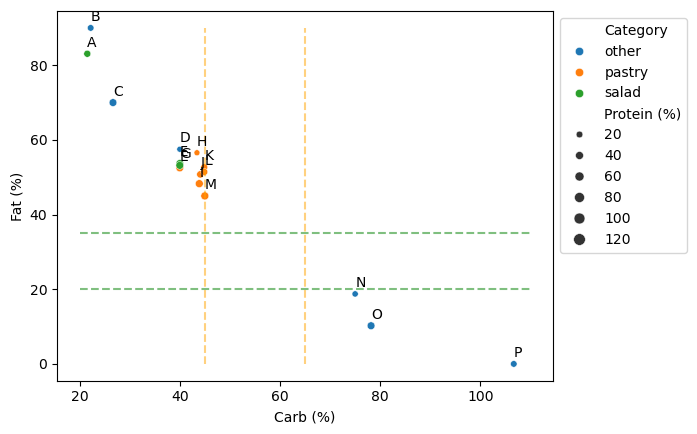

In [292]:
unhealthy = food[food['Healthy score (/3)']==0].sort_values(by='Carb (%)', ascending=True)
x=list(unhealthy['Carb (%)'])
y=list(unhealthy['Fat (%)'])
LABELS = list(unhealthy['Item'])
print(LABELS)
print(len(LABELS))
LABELS = list(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'])

ax = sns.scatterplot(data=unhealthy, x='Carb (%)', y='Fat (%)', size=food['Protein (%)']*4, hue='Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for i, label in enumerate(LABELS):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='left')
xrange = [20, 110]
yrange = [0, 90]
plt.plot(xrange, [20, 20], "--", color='green', alpha=0.5)
plt.plot(xrange, [35, 35], "--", color='green', alpha=0.5)

plt.plot([45, 45], yrange, "--", color='orange', alpha=0.5)
plt.plot([65, 65], yrange, "--", color='orange', alpha=0.5)

['Ham & Cheese Croissant', 'Peanut butter cup cookie', 'Butterfly Cookie', 'Almond Croissant', 'Chocolate Hazelnut Croissant', 'Double Chocolate Brownie', 'Double Chocolate Chunk Brownie', 'Cheese Danish', 'Chocolate Croissant', 'Vermont Maple Walnut Muffin', 'Ice Cream Cone Sugar Cookie', 'Butter Croissant', 'Old-Fashioned Glazed Doughnut', 'Pecan Tart', 'Octopus Cookie', 'Apple Fritter', 'Double Chocolate Loaf Cake', "Devil's Food Doughnut", 'Banana Nut Bread', 'Vanilla Bean Whoopie Pie', 'Raspberry Whoopie Pie', 'Chocolate Chip Cookie Dough Cake Pop', 'Strawberry Cake Pop', 'Chocolate Marble Loaf Cake', 'Pirate Cake Pop', 'Birthday Cake Pop', 'Chocolate Chip Cookie', 'Chocolate Chunk Muffin', 'Oatmeal Cookie', 'Blueberry Muffin with Yogurt and Honey', 'Cinnamon Morning Bun', 'Chocolate Cake Pop', 'Iced Lemon Pound Cake', 'Raspberry Swirl Loaf Cake', 'Blueberry Scone', 'Classic Coffee Cake', 'Toffeedoodle', 'Petite Vanilla Bean Scone', 'Michigan Cherry Oat Bar', 'Cranberry Orange Sco

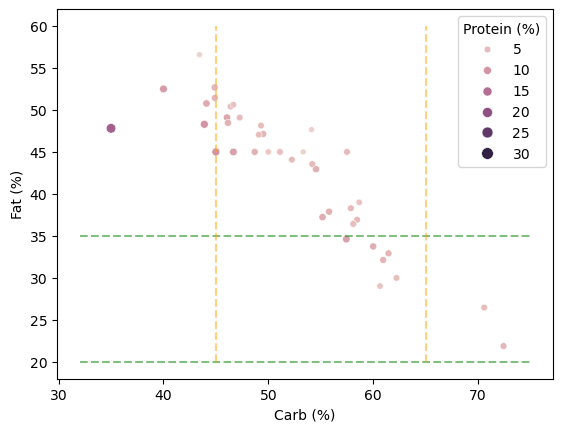

In [314]:
pastries= food[food['Category']=='pastry'].sort_values(by='Carb (%)', ascending=True)
pastries
x=list(pastries['Carb (%)'])
y=list(pastries['Fat (%)'])
LABELS = list(pastries['Item'])
print(LABELS)
print(len(LABELS))
LABELS = list(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'])

ax = sns.scatterplot(data=pastries, x='Carb (%)', y='Fat (%)', size=food['Protein (%)'], hue=food['Protein (%)'])
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# for i, label in enumerate(LABELS):
#     plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='left')
xrange = [32, 75]
yrange = [20, 60]
plt.plot(xrange, [20, 20], "--", color='green', alpha=0.5)
plt.plot(xrange, [35, 35], "--", color='green', alpha=0.5)

plt.plot([45, 45], yrange, "--", color='orange', alpha=0.5)
plt.plot([65, 65], yrange, "--", color='orange', alpha=0.5)